<a href="https://colab.research.google.com/github/regina-fonseca-avila/data_science/blob/main/venn_diagram/venn_diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Venn Diagrams

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%run file path of venn_diagram_functions.ipynb

In [3]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn2_circles, venn3, venn3_circles, venn2_unweighted
#import numpy as np
from collections import Counter
import plotly.graph_objects as go

# Basic Example:

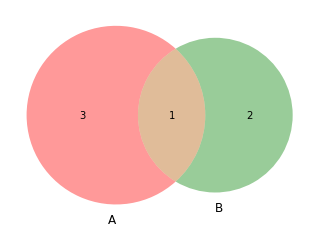

In [4]:
# [1]
venn2(subsets = (3, 2, 1));

# Basic Example + Customize Labels

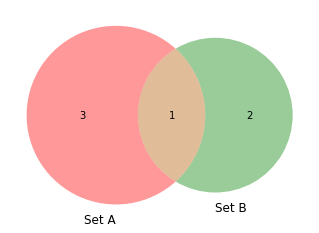

In [5]:
# [1]
venn2(subsets = (3, 2, 1),
      set_labels=('Set A', 'Set B')
      );

# Basic Example + Colors

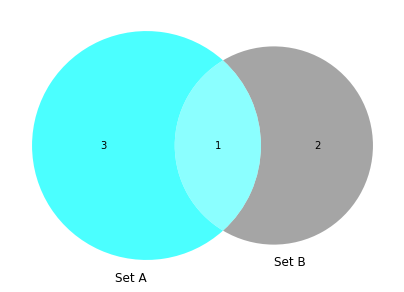

In [6]:
# [2]
plt.figure(figsize=(7,7))
colors = ['cyan','gray']
venn2(subsets = (3, 2, 1),
      set_labels=('Set A', 'Set B'),
      set_colors = colors,
      alpha = 0.7
      );

# Font: color, size, weight

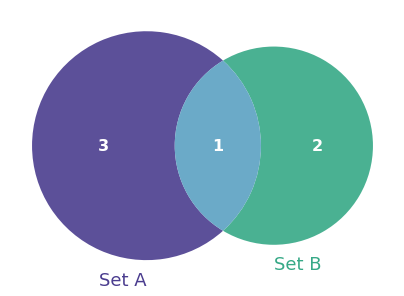

In [7]:
# [2]
plt.figure(figsize=(7,7))
ax = plt.gca()
colors = ['#4b3d8f','#37a987']
v = venn2(subsets = (3, 2, 1),
          set_labels=('Set A', 'Set B'),
          set_colors = colors,
          alpha = 0.9
         ) 
i = 0
for text in v.set_labels:
  text.set_color(colors[i])
  text.set_fontsize(18)
  i+=1

for text in v.subset_labels:
  text.set_color('white')
  text.set_fontsize(16)
  text.set_fontweight('bold')

# Legend and title

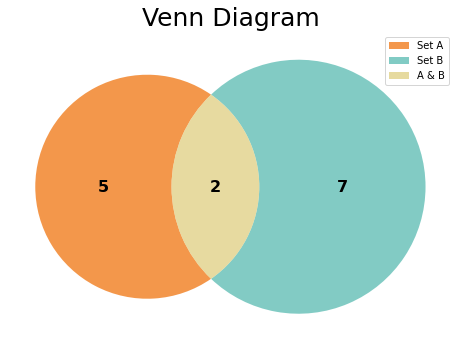

In [8]:
# [2]
# used in legends

sets = Counter() # set order A, B
sets['10'] = 5 #10 denotes A on, B off
sets['01'] = 7 #01 denotes A off, B on
sets['11'] = 2 #11 denotes A on, B on
labels = ('Set A', 'Set B')

plt.figure(figsize=(8,8))
ax = plt.gca()
colors = ['#ef6c00','#4db6ac']

v = venn2(subsets = sets, 
          set_labels=('','',''),
          ax=ax,
          set_colors=colors,
          alpha=0.7)  

for text in v.subset_labels:
  text.set_color('black')
  text.set_fontsize(16)
  text.set_fontweight('bold')

h = [] 
for i in sets:
    h.append(v.get_patch_by_id(i)) #get color patches 
l = ['Set A','Set B','A & B']
ax.legend(handles=h, labels=l,loc='upper right')  #write labels for color patches

plt.title('Venn Diagram', size = 25)
plt.show()

## Remove A&B from legend

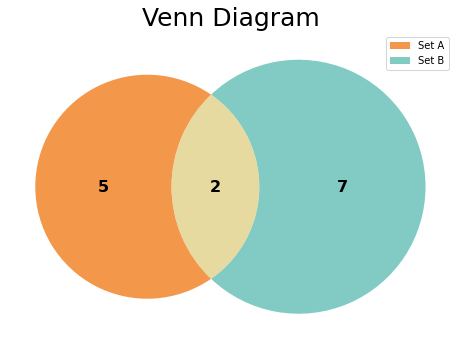

In [9]:
# [2]
# used in legends

sets = Counter() # set order A, B
sets['10'] = 5 #10 denotes A on, B off
sets['01'] = 7 #01 denotes A off, B on
sets['11'] = 2 #11 denotes A on, B on
labels = ('Set A', 'Set B')

plt.figure(figsize=(8,8))
ax = plt.gca()
colors = ['#ef6c00','#4db6ac']

v = venn2(subsets = sets, 
          set_labels=('','',''),
          ax=ax,
          set_colors=colors,
          alpha=0.7)

for text in v.subset_labels:
  text.set_color('black')
  text.set_fontsize(16)
  text.set_fontweight('bold')

h = [] 
for i in sets:
    h.append(v.get_patch_by_id(i)) #get color patches 
l = ['Set A','Set B','A & B']
ax.legend(handles=h[0:2], labels=l[0:2],loc='upper right')  #write labels for color patches

plt.title('Venn Diagram', size = 25)
plt.show()

# Line Style of Circles

## Solid

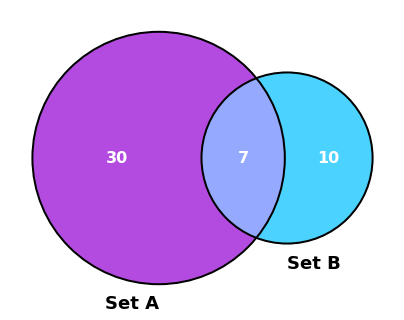

In [10]:
# [2,3]
plt.figure(figsize=(7,7))
ax = plt.gca()
colors = ('darkviolet','deepskyblue')
v = venn2(subsets = (30, 10, 7),
          set_labels=('Set A', 'Set B'),
          set_colors = colors,
          alpha = 0.7
         ) 

i = 0
for text in v.set_labels:
  text.set_fontsize(18)
  text.set_fontweight('bold')
  i+=1

for text in v.subset_labels:
  text.set_color('white')
  text.set_fontsize(16)
  text.set_fontweight('bold')


venn2_circles(subsets = (30, 10, 7),
              linewidth=2, color='k');

## Dashed

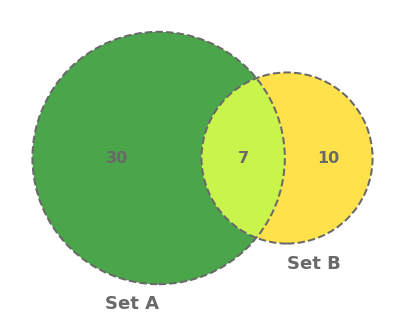

In [11]:
# [2,3]
plt.figure(figsize=(7,7))
ax = plt.gca()
colors = ('green','gold')
v = venn2(subsets = (30, 10, 7),
          set_labels=('Set A', 'Set B'),
          set_colors = colors,
          alpha = 0.7
         ) 
i = 0
for text in v.set_labels:
  text.set_fontsize(18)
  text.set_fontweight('bold')
  text.set_color('dimgray')
  i+=1

for text in v.subset_labels:
  text.set_color('dimgray')
  text.set_fontsize(16)
  text.set_fontweight('bold')


venn2_circles(subsets = (30, 10, 7),
              linestyle='dashed', 
              linewidth=2, 
              color="dimgray");

# Customize colors of areas of the diagram


## Change one group only

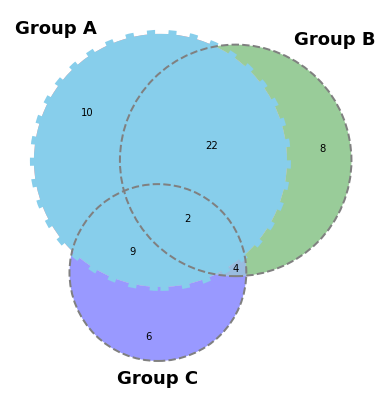

In [12]:
[5]
plt.figure(figsize=(7,7))

v = venn3(subsets = (10, 8, 22, 6,9,4,2),
        set_labels = ('Group A', 'Group B', 'Group C')
        )
c = venn3_circles(subsets = (10, 8, 22, 6, 9, 4, 2), 
                  linestyle='dashed', 
                  linewidth=2, 
                  color="grey")
c[0].set_lw(8.0)
c[0].set_ls('dotted')
c[0].set_color('skyblue')

i = 0
for text in v.set_labels:
  text.set_fontsize(18)
  text.set_fontweight('bold')
  i+=1

## Customize the colors and text of an area

You can customize the colors of each area of the diagram with the get_patch_by_id method [1,3]

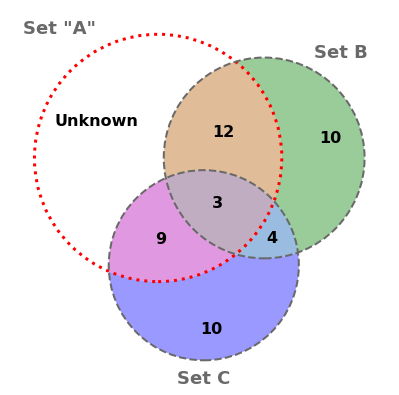

In [13]:

plt.figure(figsize=(7,7))

v = venn3(subsets = (20, 10, 12, 10, 9, 4, 3), 
          set_labels = ('Set A', 'Set B', 'Set C'));


c = venn3_circles(subsets = (20, 10, 12, 10, 9, 4, 3),
                  linestyle='dashed',
                  linewidth=2, 
                  color='dimgray');

c[0].set_lw(3.0)
c[0].set_ls('dotted')
c[0].set_edgecolor('red')


i = 0
for text in v.set_labels:
  text.set_fontsize(18)
  text.set_color('dimgray')
  text.set_fontweight('bold')
  i+=1

for text in v.subset_labels:
  text.set_color('black')
  text.set_fontsize(16)
  text.set_fontweight('bold')

# customize color of subset '100'
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('Set "A"')


The diagram for id to call for each area can be found in [3,6]

# Disjoint set



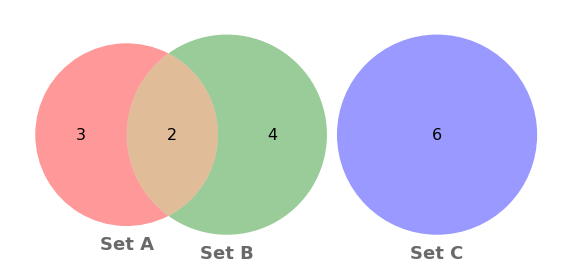

In [14]:
# [4]

# subsets = A list (or a tuple) with 7 numbers, denoting the sizes of the regions in the following order:
# (100, 010, 110, 001, 101, 011, 111).

plt.figure(figsize=(10,6))

v = venn3(subsets = (3,4,2,6,0,0,0), 
          set_labels = ('Set A', 'Set B', 'Set C'));

i = 0
for text in v.set_labels:
  text.set_fontsize(18)
  text.set_color('dimgray')
  text.set_fontweight('bold')
  i+=1

for id in ['100', '010', '110', '001']:
  v.get_label_by_id(id).set_fontsize(16)




# C contains AUB

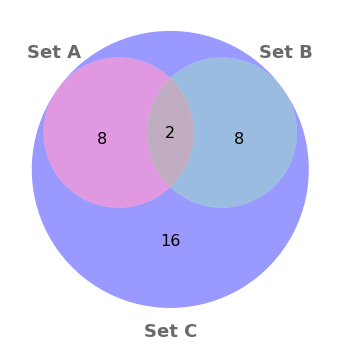

In [15]:
# [4]

plt.figure(figsize=(10,6))

# subsets = A list (or a tuple) with 7 numbers, denoting the sizes of the regions in the following order:
# (100, 010, 110, 001, 101, 011, 111)

v = venn3(subsets = (0,0,0,16,8,8,2), 
      set_labels = ('Set A', 'Set B', 'Set C'));

i = 0
for text in v.set_labels:
  text.set_fontsize(18)
  text.set_color('dimgray')
  text.set_fontweight('bold')
  i+=1

for id in ['001', '101', '011', '111']:
  v.get_label_by_id(id).set_fontsize(16)

# More examples

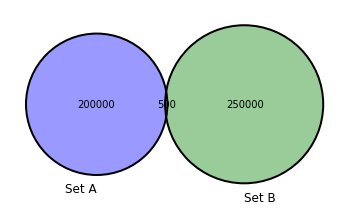

In [16]:
colors = ['blue', 'green']
venn2(subsets = (200000, 250000, 500), 
      set_colors=colors, 
      set_labels = ('Set A', 'Set B')
      )

venn2_circles(subsets = (200000, 250000, 500));

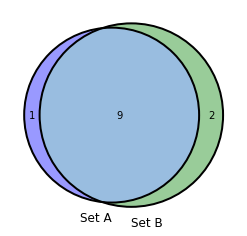

In [17]:
colors = ['blue', 'green']
venn2(subsets = (1,2,9), 
      set_colors=colors, 
      set_labels = ('Set A', 'Set B')
     )

venn2_circles(subsets = (1,2,9));

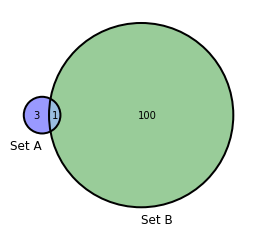

In [18]:
colors = ['blue', 'green']
venn2(subsets = (3,100,1), 
      set_colors=colors, 
      set_labels = ('Set A', 'Set B')
      )
venn2_circles(subsets = (3,100,1));

# venn2_unweighted

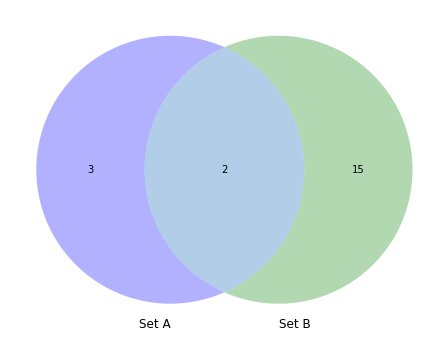

In [19]:
plt.figure(figsize=(10,6))

venn2_unweighted(subsets = (3, 15, 2),
                 set_labels = ('Set A', 
                               'Set B'),
                 set_colors=("Blue",
                             "green"),alpha=0.3)

# Plotly - Example

In [20]:
# [7]


fig = go.Figure()

# Create scatter trace of text labels
fig.add_trace(go.Scatter(
    x=[1, 1.75, 2.5],
    y=[1, 1, 1],
    text=["$A$", "$A+B$", "$B$"],
    mode="text",
    textfont=dict(
        color="black",
        size=18,
        family="Arail",
    )
))

# Update axes properties
fig.update_xaxes(
    showticklabels=False,
    showgrid=False,
    zeroline=False,
)

fig.update_yaxes(
    showticklabels=False,
    showgrid=False,
    zeroline=False,
)

# Add circles
fig.add_shape(type="circle",
    line_color="blue", fillcolor="blue",
    opacity = 0.3,
    x0=0, y0=0, x1=2, y1=2
)
fig.add_shape(type="circle",
    line_color="gray", fillcolor="gray",
    opacity = 0.3,
    x0=1.5, y0=0, x1=3.5, y1=2
)


fig.update_layout(
    margin=dict(l=20, r=20, b=100),
    height=600, width=800,
    plot_bgcolor="white"
)

fig.update_yaxes(
        scaleanchor = "x",
        scaleratio = 1,
      )

fig.show()

# Venn diagrams with Plotly

functions are in venn_diagram_functions.ipynb

## **function:** venn_diagram

In [21]:
venn_diagram('A', 'B', 10, 15, 5)

In [22]:
venn_diagram('A', 'B', 15, 10, 5)

In [23]:
# you can customize colors
venn_diagram('A', 'B', 15, 15, 5, 'orange', 'gray')

## **function:**  venn_diagram_percentage

In [24]:
venn_diagram_percentage('Set A', 'Set B', 50034,50040,  250, 'green', 'orange')

## **function:** venn_diagram_with_border_percentage

In [25]:
venn_diagram_with_border_percentage('Group A', 'Group B', 10, 11, 5, colorA = 'dimgray', colorB = 'purple')

## **function** venn_diagram_with_border_percentage_unweighted



In [26]:
venn_diagram_with_border_percentage_unweighted('Set A', 'Set B', 80000,80000,10000, '#ef6c00','#4db6ac')

In [27]:
venn_diagram_with_border_percentage_unweighted('Set A', 'Set B', 90000,80000,10000, '#ef6c00','#4db6ac')

## **function:** venn_diagram_with_border_percentage_brazil

- Thousands separator and decimal separator used in Brazil

In [28]:
venn_diagram_with_border_percentage_brazil('Set A', 'Set B', 90000,70000,10000, 'green', 'yellow')

[1] [matplotlib-venn 0.11.6](https://pypi.org/project/matplotlib-venn/)

[2] [Professional Venn diagrams in Python](https://towardsdatascience.com/professional-venn-diagrams-in-python-638abfff39cc)

[3] [How to Create and Customize Venn Diagrams in Python](https://towardsdatascience.com/how-to-create-and-customize-venn-diagrams-in-python-263555527305)

[4] [How to Design Professional Venn Diagrams in Python](https://www.manystories.com/story/how-to-design-professional-venn-diagrams-in-python--u-5f1483506baa1a001fa4533c)

[5] [Custom Venn diagram](https://www.python-graph-gallery.com/172-custom-venn-diagram)

[6] [Venn diagram](https://en.wikipedia.org/wiki/Venn_diagram)

[7] [Plotly - Shapes in Python](https://plotly.com/python/shapes/#venn-diagram-with-circle-shapes)

[8] [How to set the bold font style in Plotly](https://stackoverflow.com/questions/46512682/how-to-set-the-bold-font-style-in-plotly)